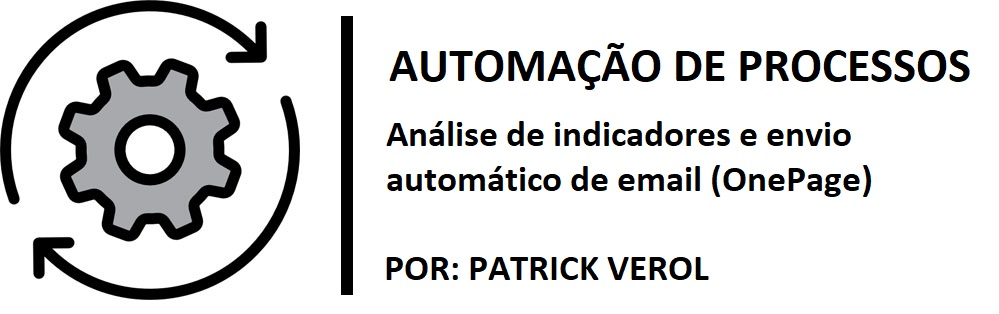

### Objetivo: 

Criar um modelo automatizado de análise de desempenho de várias lojas de uma empresa, com base nos indicadores pré-definidos pela diretoria.


### Descrição:

Será simulada uma grande rede de lojas de roupa com 25 lojas espalhadas por todo o Brasil.

Todo dia, pela manhã, serão calculados os chamados One Pages de cada loja e enviados para seus respectivos gerentes.

 - Um One Page é um resumo muito simples e direto ao ponto, usado pela equipe de gerência de loja para saber os principais indicadores de cada loja e permitir em 1 página (OnePage) tanto a comparação entre diferentes lojas, quanto quais indicadores aquela loja conseguiu cumprir naquele dia ou não.

Exemplo de OnePage:

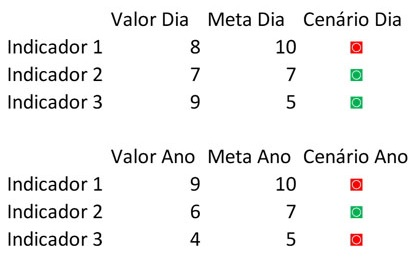

O objetivo do projeto é criar um processo automatizado para calcular o OnePage de cada loja e enviar um email para o gerente de cada loja com o seu OnePage no corpo do e-mail e também o arquivo completo com os dados da sua respectiva loja em anexo.

Exemplo de email a ser enviado:

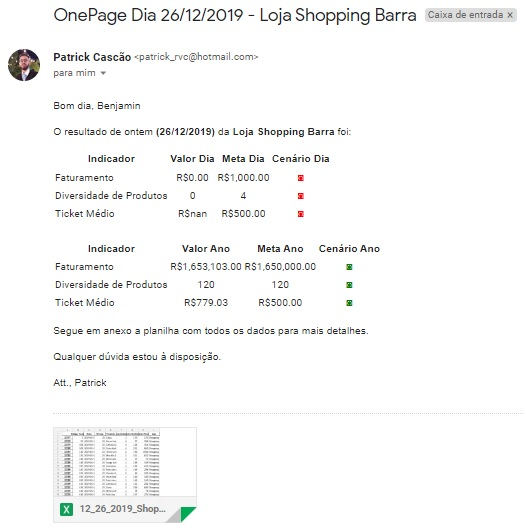

### Indicadores do OnePage

- Faturamento:<br>
Meta Ano: 1.650.000<br>
Meta Dia: 1000<br><br>

- Diversidade de Produtos (quantos produtos diferentes foram vendidos naquele período):<br>
Meta Ano: 120<br>
Meta Dia: 4<br><br>

- Ticket Médio por Venda:<br>
Meta Ano: 500<br>
Meta Dia: 500<br>

Cada indicador será calculado no dia e no ano.

O indicador do dia será o do último dia disponível na planilha de Vendas (a data mais recente).

## ETAPAS:

1. Importação de bibliotecas e arquivos
2. Criando uma Tabela para cada Loja e definindo o dia do Indicador
3. Salvar as planilhas na pasta de backup
4. Criando variáveis para as metas
5. Enviando por e-mail para os gerentes
6. Criando ranking entre as lojas
7. Enviando e-mail para diretoria

## 1. Importação de bibliotecas e arquivos

In [22]:
import pandas as pd
import win32com.client as win32
import pathlib

In [23]:
emails = pd.read_excel(r'Bases de Dados\Emails.xlsx')
lojas = pd.read_csv(r'Bases de Dados\Lojas.csv', encoding='latin1', sep=';')
vendas = pd.read_excel(r'Bases de Dados\Vendas.xlsx')
display(emails)
display(lojas)
display(vendas)

,Loja,Gerente,E-mail
0,Iguatemi Esplanada,Helena,patrickverol2@gmail.com
1,Shopping Midway Mall,Alice,patrickverol2@gmail.com
2,Norte Shopping,Laura,patrickverol2@gmail.com
3,Shopping Iguatemi Fortaleza,Manuela,patrickverol2@gmail.com
4,Shopping União de Osasco,Valentina,patrickverol2@gmail.com
5,Shopping Center Interlagos,Sophia,patrickverol2@gmail.com
6,Rio Mar Recife,Isabella,patrickverol2@gmail.com
7,Salvador Shopping,Heloisa,patrickverol2@gmail.com
8,Rio Mar Shopping Fortaleza,Luiza,patrickverol2@gmail.com
9,Shopping Center Leste Aricanduva,Julia,patrickverol2@gmail.com


,ID Loja,Loja
0,1,Iguatemi Esplanada
1,2,Shopping Midway Mall
2,3,Norte Shopping
3,4,Shopping Iguatemi Fortaleza
4,5,Shopping União de Osasco
5,6,Shopping Center Interlagos
6,7,Rio Mar Recife
7,8,Salvador Shopping
8,9,Rio Mar Shopping Fortaleza
9,10,Shopping Center Leste Aricanduva


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,1,Sapato Estampa,1,358,358
1,1,2019-01-01,1,Camiseta,2,180,360
2,1,2019-01-01,1,Sapato Xadrez,1,368,368
3,2,2019-01-02,3,Relógio,3,200,600
4,2,2019-01-02,3,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,17,Short Listrado,2,102,204
100995,69996,2019-12-26,17,Mochila,4,270,1080
100996,69996,2019-12-26,17,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,11,Camisa Listrado,1,108,108


## 2. Criando uma Tabela para cada Loja e definindo o dia do Indicador

In [24]:
#incluir nome da loja em vendas

vendas = vendas.merge(lojas, on='ID Loja')
display(vendas)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
0,1,2019-01-01,1,Sapato Estampa,1,358,358,Iguatemi Esplanada
1,1,2019-01-01,1,Camiseta,2,180,360,Iguatemi Esplanada
2,1,2019-01-01,1,Sapato Xadrez,1,368,368,Iguatemi Esplanada
3,21,2019-01-02,1,Camisa Gola V Listrado,2,116,232,Iguatemi Esplanada
4,34,2019-01-02,1,Sapato Listrado,1,363,363,Iguatemi Esplanada
...,...,...,...,...,...,...,...,...
100994,69846,2019-12-25,8,Short Estampa,2,96,192,Salvador Shopping
100995,69846,2019-12-25,8,Tênis Estampa,5,256,1280,Salvador Shopping
100996,69850,2019-12-25,8,Calça Estampa,4,177,708,Salvador Shopping
100997,69972,2019-12-26,8,Terno Liso,3,720,2160,Salvador Shopping


In [25]:
# Criando um dicionário de dataframes 
# Com a Chave (Key) sendo o 'Nome de cada Loja' e o Valor seu respectivo Dataframe 

dicionario_lojas = {}

for loja in lojas['Loja']:
    dicionario_lojas[loja] = vendas.loc[vendas['Loja']==loja, :]

display(dicionario_lojas['Rio Mar Recife'])

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
72551,46,2019-01-02,7,Camisa,1,100,100,Rio Mar Recife
72552,46,2019-01-02,7,Calça Liso,2,190,380,Rio Mar Recife
72553,46,2019-01-02,7,Cinto,1,200,200,Rio Mar Recife
72554,87,2019-01-02,7,Camisa Estampa,1,113,113,Rio Mar Recife
72555,109,2019-01-02,7,Camisa Gola V Listrado,3,116,348,Rio Mar Recife
...,...,...,...,...,...,...,...,...
76645,69905,2019-12-25,7,Mochila Listrado,2,275,550,Rio Mar Recife
76646,69905,2019-12-25,7,Camisa Xadrez,3,105,315,Rio Mar Recife
76647,69905,2019-12-25,7,Tênis Liso,3,266,798,Rio Mar Recife
76648,69954,2019-12-25,7,Chinelo,3,60,180,Rio Mar Recife


In [26]:
# O dia indicador refere-se a última data planilha, data a qual ocorreu a última atualização dos dados

dia_indicador = vendas['Data'].max()

print(dia_indicador)
print('{}/{}/{}'.format(dia_indicador.day, dia_indicador.month, dia_indicador.year))

2019-12-26 00:00:00
26/12/2019


## 3. Salvar as planilhas na pasta de backup

In [27]:
#identificar se a pasta já existe

# Caminho da pasta
caminho_backup = pathlib.Path(r'C:\Users\PICHAU\Documents\16. PYTHON\13. Projeto 1 - Automação de Processos\Backup Arquivos Lojas')

# iterdir -> Verificar todos os arquivos dentro da pasta
arquivos_pasta_backup = caminho_backup.iterdir()  

# Lista com o nome de todos os arquivos da pasta
lista_nomes_backup = [arquivo.name for arquivo in arquivos_pasta_backup]


for loja in dicionario_lojas:
    if loja not in lista_nomes_backup:
        nova_pasta = caminho_backup / loja
        nova_pasta.mkdir()
    
    #salvar dentro da pasta
    nome_arquivo = '{}_{}_{}_{}.xlsx'.format(dia_indicador.month, dia_indicador.day, dia_indicador.year, loja)
    local_arquivo = caminho_backup / loja / nome_arquivo
    dicionario_lojas[loja].to_excel(local_arquivo)

## 4. Criando variáveis para as metas

In [28]:
# Uma variável para cada meta que foi préviamente definida

meta_faturamento_dia = 1000
meta_faturamento_ano = 1650000
meta_qtdeprodutos_dia = 4
meta_qtdeprodutos_ano = 120
meta_ticketmedio_dia = 500
meta_ticketmedio_ano = 500

## 5. Enviando por e-mail para os gerentes

In [29]:
for loja in dicionario_lojas:

    vendas_loja = dicionario_lojas[loja]
    vendas_loja_dia = vendas_loja.loc[vendas_loja['Data']==dia_indicador, :]

    #faturamento
    faturamento_ano = vendas_loja['Valor Final'].sum()
    #print(faturamento_ano)
    faturamento_dia = vendas_loja_dia['Valor Final'].sum()
    #print(faturamento_dia)

    #diversidade de produtos
    qtde_produtos_ano = len(vendas_loja['Produto'].unique())
    #print(qtde_produtos_ano)
    qtde_produtos_dia = len(vendas_loja_dia['Produto'].unique())
    #print(qtde_produtos_dia)


    #ticket medio
    valor_venda = vendas_loja.groupby('Código Venda').sum()
    ticket_medio_ano = valor_venda['Valor Final'].mean()
    #print(ticket_medio_ano)
    
    #ticket_medio_dia
    valor_venda_dia = vendas_loja_dia.groupby('Código Venda').sum()
    ticket_medio_dia = valor_venda_dia['Valor Final'].mean()
    #print(ticket_medio_dia)
    
    
    #enviar o e-mail
    outlook = win32.Dispatch('outlook.application')

    nome = emails.loc[emails['Loja']==loja, 'Gerente'].values[0]
    mail = outlook.CreateItem(0)
    mail.To = emails.loc[emails['Loja']==loja, 'E-mail'].values[0]
    mail.Subject = f'OnePage Dia {dia_indicador.day}/{dia_indicador.month}/{dia_indicador.year} - Loja {loja}'
    #mail.Body = 'Texto do E-mail'
    
    if faturamento_dia >= meta_faturamento_dia:
        cor_fat_dia = 'green'
    else:
        cor_fat_dia = 'red'
    if faturamento_ano >= meta_faturamento_ano:
        cor_fat_ano = 'green'
    else:
        cor_fat_ano = 'red'
    if qtde_produtos_dia >= meta_qtdeprodutos_dia:
        cor_qtde_dia = 'green'
    else:
        cor_qtde_dia = 'red'
    if qtde_produtos_ano >= meta_qtdeprodutos_ano:
        cor_qtde_ano = 'green'
    else:
        cor_qtde_ano = 'red'
    if ticket_medio_dia >= meta_ticketmedio_dia:
        cor_ticket_dia = 'green'
    else:
        cor_ticket_dia = 'red'
    if ticket_medio_ano >= meta_ticketmedio_ano:
        cor_ticket_ano = 'green'
    else:
        cor_ticket_ano = 'red'

    mail.HTMLBody = f'''
    <p>Bom dia, {nome}</p>

    <p>O resultado de ontem <strong>({dia_indicador.day}/{dia_indicador.month}/{dia_indicador.year})</strong> da <strong>Loja {loja}</strong> foi:</p>

    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor Dia</th>
        <th>Meta Dia</th>
        <th>Cenário Dia</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${faturamento_dia:,.2f}</td>
        <td style="text-align: center">R${meta_faturamento_dia:,.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_dia}">◙</font></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{qtde_produtos_dia}</td>
        <td style="text-align: center">{meta_qtdeprodutos_dia}</td>
        <td style="text-align: center"><font color="{cor_qtde_dia}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_medio_dia:,.2f}</td>
        <td style="text-align: center">R${meta_ticketmedio_dia:,.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_dia}">◙</font></td>
      </tr>
    </table>
    <br>
    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor Ano</th>
        <th>Meta Ano</th>
        <th>Cenário Ano</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style="text-align: center">R${faturamento_ano:,.2f}</td>
        <td style="text-align: center">R${meta_faturamento_ano:,.2f}</td>
        <td style="text-align: center"><font color="{cor_fat_ano}">◙</font></td>
      </tr>
      <tr>
        <td>Diversidade de Produtos</td>
        <td style="text-align: center">{qtde_produtos_ano}</td>
        <td style="text-align: center">{meta_qtdeprodutos_ano}</td>
        <td style="text-align: center"><font color="{cor_qtde_ano}">◙</font></td>
      </tr>
      <tr>
        <td>Ticket Médio</td>
        <td style="text-align: center">R${ticket_medio_ano:,.2f}</td>
        <td style="text-align: center">R${meta_ticketmedio_ano:,.2f}</td>
        <td style="text-align: center"><font color="{cor_ticket_ano}">◙</font></td>
      </tr>
    </table>

    <p>Segue em anexo a planilha com todos os dados para mais detalhes.</p>

    <p>Qualquer dúvida estou à disposição.</p>
    <p>Att., Patrick</p>
    '''

    # Anexos:
    attachment  = pathlib.Path.cwd() / caminho_backup / loja / f'{dia_indicador.month}_{dia_indicador.day}_{dia_indicador.year}_{loja}.xlsx'
    mail.Attachments.Add(str(attachment))

    mail.Send()
    print('E-mail da Loja {} enviado'.format(loja))

E-mail da Loja Iguatemi Esplanada enviado
E-mail da Loja Shopping Midway Mall enviado
E-mail da Loja Norte Shopping enviado
E-mail da Loja Shopping Iguatemi Fortaleza enviado
E-mail da Loja Shopping União de Osasco enviado
E-mail da Loja Shopping Center Interlagos enviado
E-mail da Loja Rio Mar Recife enviado
E-mail da Loja Salvador Shopping enviado
E-mail da Loja Rio Mar Shopping Fortaleza enviado
E-mail da Loja Shopping Center Leste Aricanduva enviado
E-mail da Loja Ribeirão Shopping enviado
E-mail da Loja Shopping Morumbi enviado
E-mail da Loja Parque Dom Pedro Shopping enviado
E-mail da Loja Bourbon Shopping SP enviado
E-mail da Loja Palladium Shopping Curitiba enviado
E-mail da Loja Passei das Águas Shopping enviado
E-mail da Loja Center Shopping Uberlândia enviado
E-mail da Loja Shopping Recife enviado
E-mail da Loja Shopping Vila Velha enviado
E-mail da Loja Shopping SP Market enviado
E-mail da Loja Shopping Eldorado enviado
E-mail da Loja Shopping Ibirapuera enviado
E-mail da L

## 6. Criando ranking entre as lojas

In [30]:
# Criando ranking de vendas anual
faturamento_lojas_ano = vendas.groupby('Loja')[['Loja', 'Valor Final']].sum()
faturamento_lojas_ano = faturamento_lojas_ano.sort_values(by='Valor Final', ascending=False)
display(faturamento_lojas_ano)

# Transformando o Dataframe em excel
nome_arquivo = '{}_{}_{}_Ranking Anual.xlsx'.format(dia_indicador.month, dia_indicador.day, dia_indicador.year)
faturamento_lojas_ano.to_excel(r'Backup Arquivos Lojas\{}'.format(nome_arquivo))

# Criando ranking de vendas no dia
vendas_dia = vendas.loc[vendas['Data']==dia_indicador, :]
faturamento_lojas_dia = vendas_dia.groupby('Loja')[['Loja', 'Valor Final']].sum()
faturamento_lojas_dia = faturamento_lojas_dia.sort_values(by='Valor Final', ascending=False)
display(faturamento_lojas_dia)

# Transformando o Dataframe em excel
nome_arquivo = '{}_{}_{}_Ranking Dia.xlsx'.format(dia_indicador.month, dia_indicador.day, dia_indicador.year)
faturamento_lojas_dia.to_excel(r'Backup Arquivos Lojas\{}'.format(nome_arquivo))

,Valor Final
Loja,
Iguatemi Campinas,1762419
Shopping Vila Velha,1731167
Bourbon Shopping SP,1726110
Rio Mar Recife,1722766
Shopping SP Market,1721763
Palladium Shopping Curitiba,1721120
Norte Shopping,1711968
Ribeirão Shopping,1707122
Iguatemi Esplanada,1699681


,Valor Final
Loja,
Salvador Shopping,3950
Novo Shopping Ribeirão Preto,3400
Center Shopping Uberlândia,2651
Shopping Eldorado,2391
Shopping Center Interlagos,1582
Shopping Recife,1366
Norte Shopping,1259
Shopping União de Osasco,1207
Shopping Vila Velha,937


## 7. Enviando e-mail para diretoria

In [31]:
# Enviar o e-mail
outlook = win32.Dispatch('outlook.application')

mail = outlook.CreateItem(0)
mail.To = emails.loc[emails['Loja']=='Diretoria', 'E-mail'].values[0]
mail.Subject = f'Ranking Dia {dia_indicador.day}/{dia_indicador.month}/{dia_indicador.year}'
mail.Body = f'''
Prezados, bom dia

Melhor loja do Dia em Faturamento: Loja {faturamento_lojas_dia.index[0]} com Faturamento R$ {faturamento_lojas_dia.iloc[0, 0]:,.2f}
Pior loja do Dia em Faturamento: Loja {faturamento_lojas_dia.index[-1]} com Faturamento R$ {faturamento_lojas_dia.iloc[-1, 0]:,.2f}

Melhor loja do Ano em Faturamento: Loja {faturamento_lojas_ano.index[0]} com Faturamento R$ {faturamento_lojas_ano.iloc[0, 0]:,.2f}
Pior loja do Ano em Faturamento: Loja {faturamento_lojas_ano.index[-1]} com Faturamento R$ {faturamento_lojas_ano.iloc[-1, 0]:,.2f}

Segue em anexo os rankings do ano e do dia de todas as lojas.

Qualquer dúvida estou à disposição.

Att.,
Patrick
'''

# Anexos:
attachment  = caminho_backup / f'{dia_indicador.month}_{dia_indicador.day}_{dia_indicador.year}_Ranking Anual.xlsx'
mail.Attachments.Add(str(attachment))

attachment  = caminho_backup / f'{dia_indicador.month}_{dia_indicador.day}_{dia_indicador.year}_Ranking Dia.xlsx'
mail.Attachments.Add(str(attachment))


mail.Send()
print('E-mail da Diretoria enviado')

E-mail da Diretoria enviado
